# Collaborative Filtering and Light FM

In [78]:
import pandas as pd
import numpy as np

In [79]:
rating = pd.read_csv('d:\\Desktop/Netflix_Dataset_Rating.csv')
rating

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [80]:
movies = pd.read_csv('https://raw.githubusercontent.com/ThisIs66/RS/main/Netflix_Dataset_Movie.csv')
movies

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [81]:
df = pd.merge(movies, rating, left_on = "Movie_ID", right_on = "Movie_ID", how = "inner" )
df

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_ID  int64 
 1   Year      int64 
 2   Name      object
 3   User_ID   int64 
 4   Rating    int64 
dtypes: int64(4), object(1)
memory usage: 793.6+ MB


In [120]:
df.columns =['movie_id', 'year', 'name', 'user_id', 'rating']
df

,movie_id,year,name,user_id,rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   year      int64 
 2   name      object
 3   userid    int64 
 4   rating    int64 
dtypes: int64(4), object(1)
memory usage: 793.6+ MB


In [85]:
df.isnull().sum()

movie_id    0
year        0
name        0
userid      0
rating      0
dtype: int64

In [89]:
df.rating.mean()

3.590569909383486

In [88]:
df.groupby('name').rating.mean().sort_values(ascending = False).head(10)

name
Lost: Season 1                                   4.665432
The Simpsons: Season 6                           4.589824
Family Guy: Freakin' Sweet Collection            4.520766
Six Feet Under: Season 4                         4.461601
Inu-Yasha                                        4.457774
Stargate SG-1: Season 8                          4.456026
The Best of Friends: Vol. 4                      4.449168
The West Wing: Season 3                          4.436258
Lord of the Rings: The Fellowship of the Ring    4.431489
Gilmore Girls: Season 3                          4.428943
Name: rating, dtype: float64

In [159]:
mean_rating=df.groupby('name').rating.mean().sort_values(ascending = False)
mean_rating

name
Lost: Season 1                           4.665432
The Simpsons: Season 6                   4.589824
Family Guy: Freakin' Sweet Collection    4.520766
Six Feet Under: Season 4                 4.461601
Inu-Yasha                                4.457774
                                           ...   
Ernest Goes to Jail                      2.221938
Freddy Got Fingered                      2.217361
Gerry                                    2.203597
Spice World                              2.101550
House of the Dead                        1.962031
Name: rating, Length: 1342, dtype: float64

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\alway\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

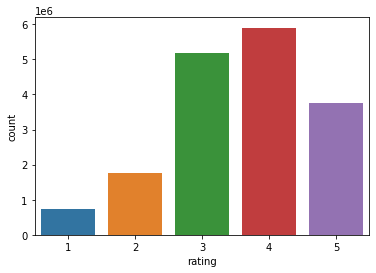

In [91]:
sns.countplot(df.rating)

In [92]:
ratings=pd.DataFrame(df.groupby('name')['rating'].mean())
ratings

,rating
name,
10,3.113049
10 Things I Hate About You,3.703471
101 Dalmatians II: Patch's London Adventure,3.528282
11:14,3.260153
13 Ghosts,3.595732
...,...
Yojimbo,4.021298
Young Black Stallion,3.259422
Youngblood,3.273667


In [140]:
# some movies rated by only small group user, drop the movies that not enough review
f = ['count','mean']
df_movie_summary = df.groupby('movie_id')['rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

In [184]:
movie_benchmark

11472.0

In [166]:
df_movie_summary

,count,mean
movie_id,,
3,1524,3.621391
8,9379,3.136795
16,2517,3.081843
17,4165,2.909964
18,9419,3.767597
...,...,...
4488,27997,3.540236
4490,7507,3.161849
4492,7511,2.652510


In [174]:
df_movie = pd.merge(df,df_movie_summary, left_on = "movie_id", right_on = "movie_id" )
df_movie

,movie_id,year,name,user_id,rating,count,mean
0,3,1997,Character,712664,5,1524,3.621391
1,3,1997,Character,1331154,4,1524,3.621391
2,3,1997,Character,2632461,3,1524,3.621391
3,3,1997,Character,44937,5,1524,3.621391
4,3,1997,Character,656399,4,1524,3.621391
...,...,...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3,7835,3.765795
17337454,4496,1993,Farewell My Concubine,1055714,5,7835,3.765795
17337455,4496,1993,Farewell My Concubine,2643029,4,7835,3.765795
17337456,4496,1993,Farewell My Concubine,1559566,3,7835,3.765795


## Collaborative Filtering - SVD

In [118]:
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [143]:
model = SVD(n_epochs=10,verbose = True)

data = Dataset.load_from_df(df[['user_id', 'movie_id', 'rating']], Reader())

trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

trainset = data.build_full_trainset()

model.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [144]:
predictions = model.test(testset)

accuracy.rmse(predictions, verbose=True)

RMSE: 0.8296


0.8295619580596203

In [177]:
movies

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [178]:
def Recommendation(given_user_id,n_movies):
    given_user = movies.copy()
    given_user = given_user.reset_index()
    given_user = given_user[~given_user['Movie_ID'].isin(drop_movie_list)]

    given_user['Estimated_Rating'] = given_user['Movie_ID'].apply(lambda x: model.predict(given_user_id, x).est)

    given_user = given_user.sort_values('Estimated_Rating', ascending=False)
    given_user.drop(['index'], axis = 1,inplace=True)
    given_user.reset_index(inplace=True,drop=True)
    return given_user.head(n_movies)

### Recommend for user 44937

In [179]:
Recommendation(44937,5)

,Movie_ID,Year,Name,Estimated_Rating
0,2803,1995,Pride and Prejudice,4.539115
1,872,1954,Seven Samurai,4.497611
2,1435,2001,Wallace & Gromit in Three Amazing Adventures,4.437984
3,241,1959,North by Northwest,4.424235
4,3798,1973,The Sting,4.387859


### Recommend for user 1331154

In [185]:
Recommendation(1331154,5)

,Movie_ID,Year,Name,Estimated_Rating
0,270,2001,Sex and the City: Season 4,4.578476
1,3962,2003,Finding Nemo (Widescreen),4.527743
2,2743,2002,The Pianist,4.510855
3,2452,2001,Lord of the Rings: The Fellowship of the Ring,4.501632
4,2162,2000,CSI: Season 1,4.490252


## Light FM

In [189]:
from lightfm.datasets import fetch_movielens
from lightfm import LightFM 
from lightfm.evaluation import precision_at_k
from lightfm.cross_validation import random_train_test_split

In [196]:
csr_matrix(rating)

<17337458x3 sparse matrix of type '<class 'numpy.int64'>'
	with 52012374 stored elements in Compressed Sparse Row format>

In [207]:
import scipy.integrate

import scipy.special

In [204]:
# transfer rating to sparse matrix to fit the model
dense_matrix = np.array(rating.to_numpy(), dtype=bool).astype(np.int)

<ipython-input-204-e593412c1368>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dense_matrix = np.array(rating.to_numpy(), dtype=bool).astype(np.int)


In [208]:
sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)

In [209]:
sparse_matrix

<17337458x3 sparse matrix of type '<class 'numpy.intc'>'
	with 52012374 stored elements in Compressed Sparse Row format>

In [190]:
model = LightFM(no_components=30)

In [ ]:

model.fit(sparse_matrix, epochs=20)

In [ ]:
predictions = model.predict(test_user_ids, test_item_ids)

Unable to display results.